In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
hr=pd.read_csv(r'C:\Users\hp\Downloads\HR_Employee_Attrition.csv')
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
hr.shape

(1470, 35)

In [6]:
hr['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No     1233
Yes     237
Name: Attrition, dtype: int64


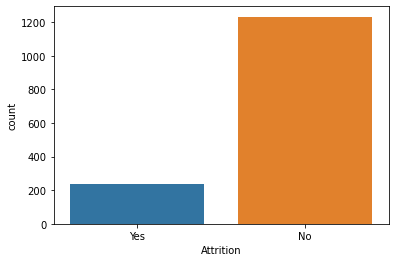

In [9]:
sns.countplot(x='Attrition',data=hr)
print(hr['Attrition'].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


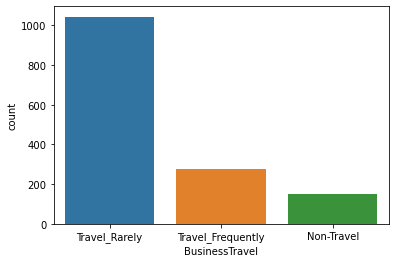

In [10]:
sns.countplot(x='BusinessTravel',data=hr)
print(hr['BusinessTravel'].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


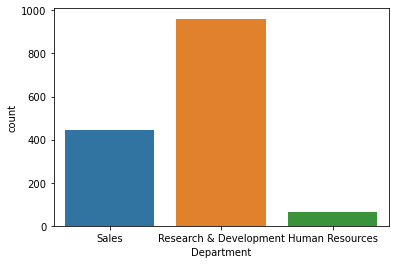

In [11]:
sns.countplot(x='Department',data=hr)
print(hr['Department'].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


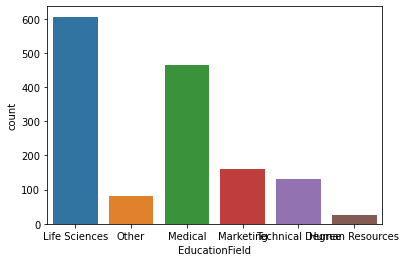

In [12]:
sns.countplot(x='EducationField',data=hr)
print(hr['EducationField'].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


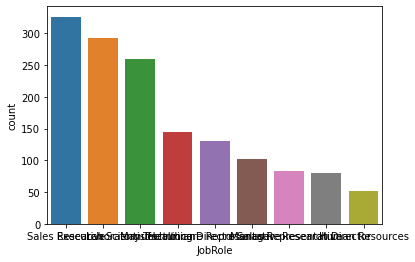

In [13]:
sns.countplot(x='JobRole',data=hr)
print(hr['JobRole'].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


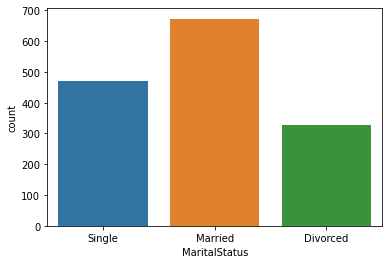

In [14]:
sns.countplot(x='MaritalStatus',data=hr)
print(hr['MaritalStatus'].value_counts())

No     1054
Yes     416
Name: OverTime, dtype: int64


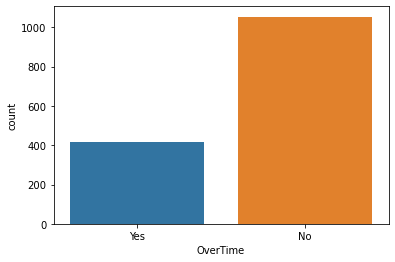

In [15]:
sns.countplot(x='OverTime',data=hr)
print(hr['OverTime'].value_counts())

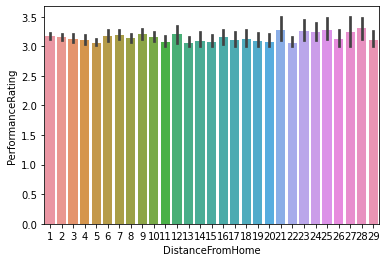

In [16]:
sns.barplot(x='DistanceFromHome',y='PerformanceRating',data=hr)

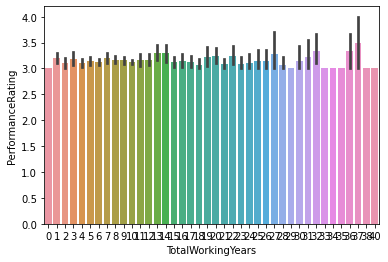

In [17]:
sns.barplot(x='TotalWorkingYears',y='PerformanceRating',data=hr)

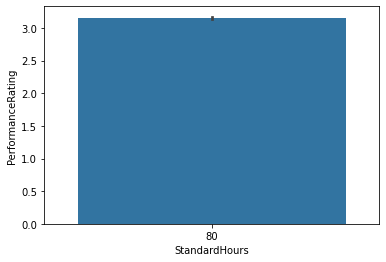

In [18]:
sns.barplot(x='StandardHours',y='PerformanceRating',data=hr)

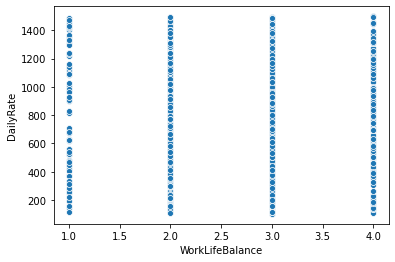

In [19]:
sns.scatterplot(x='WorkLifeBalance',y='DailyRate',data=hr)

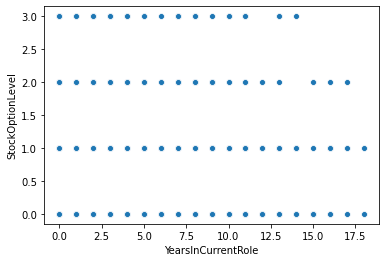

In [20]:
sns.scatterplot(x='YearsInCurrentRole',y='StockOptionLevel',data=hr)

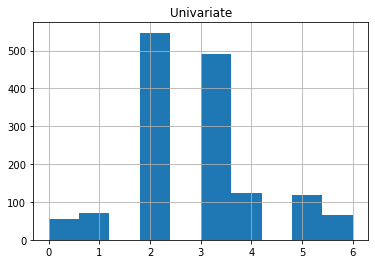

In [21]:
hr['TrainingTimesLastYear'].hist(grid=True)                # Univariate analysis
plt.title('Univariate')
plt.show()

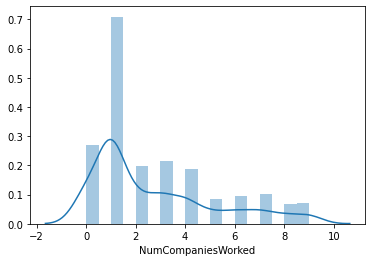

In [22]:
sns.distplot(hr['NumCompaniesWorked'],kde=True)

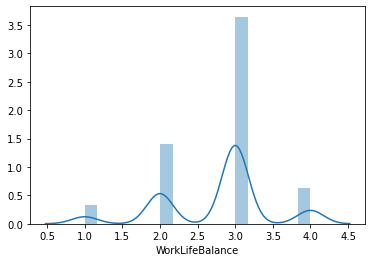

In [23]:
sns.distplot(hr['WorkLifeBalance'],kde=True)

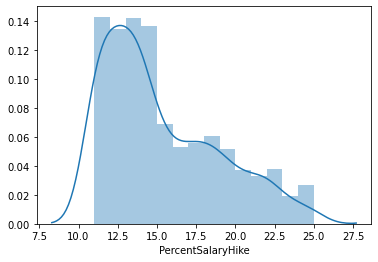

In [24]:
sns.distplot(hr['PercentSalaryHike'],kde=True)

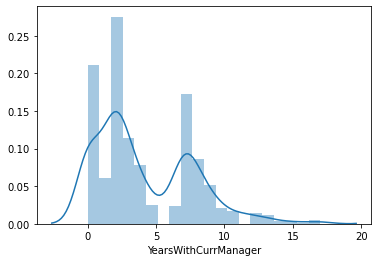

In [25]:
sns.distplot(hr['YearsWithCurrManager'],kde=True)

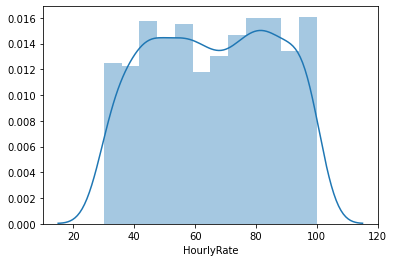

In [26]:
sns.distplot(hr['HourlyRate'],kde=True)

In [27]:
hr.groupby('Attrition')['JobRole'].value_counts()

Attrition  JobRole                  
No         Sales Executive              269
           Research Scientist           245
           Laboratory Technician        197
           Manufacturing Director       135
           Healthcare Representative    122
           Manager                       97
           Research Director             78
           Sales Representative          50
           Human Resources               40
Yes        Laboratory Technician         62
           Sales Executive               57
           Research Scientist            47
           Sales Representative          33
           Human Resources               12
           Manufacturing Director        10
           Healthcare Representative      9
           Manager                        5
           Research Director              2
Name: JobRole, dtype: int64

In [28]:
hr.groupby('Attrition')['MaritalStatus'].value_counts()

Attrition  MaritalStatus
No         Married          589
           Single           350
           Divorced         294
Yes        Single           120
           Married           84
           Divorced          33
Name: MaritalStatus, dtype: int64

In [29]:
hr.groupby('Attrition')['EducationField'].value_counts()

Attrition  EducationField  
No         Life Sciences       517
           Medical             401
           Marketing           124
           Technical Degree    100
           Other                71
           Human Resources      20
Yes        Life Sciences        89
           Medical              63
           Marketing            35
           Technical Degree     32
           Other                11
           Human Resources       7
Name: EducationField, dtype: int64

In [30]:
hr.groupby('Attrition')['Department'].value_counts()

Attrition  Department            
No         Research & Development    828
           Sales                     354
           Human Resources            51
Yes        Research & Development    133
           Sales                      92
           Human Resources            12
Name: Department, dtype: int64

In [31]:
hr.groupby('Attrition')['BusinessTravel'].value_counts()

Attrition  BusinessTravel   
No         Travel_Rarely        887
           Travel_Frequently    208
           Non-Travel           138
Yes        Travel_Rarely        156
           Travel_Frequently     69
           Non-Travel            12
Name: BusinessTravel, dtype: int64

In [32]:
hr.groupby('Attrition')['Gender'].value_counts()

Attrition  Gender
No         Male      732
           Female    501
Yes        Male      150
           Female     87
Name: Gender, dtype: int64

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in hr.columns:
    if hr[i].dtype=="object":
        hr[i]=enc.fit_transform(hr[i].values.reshape(-1,1))

In [34]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


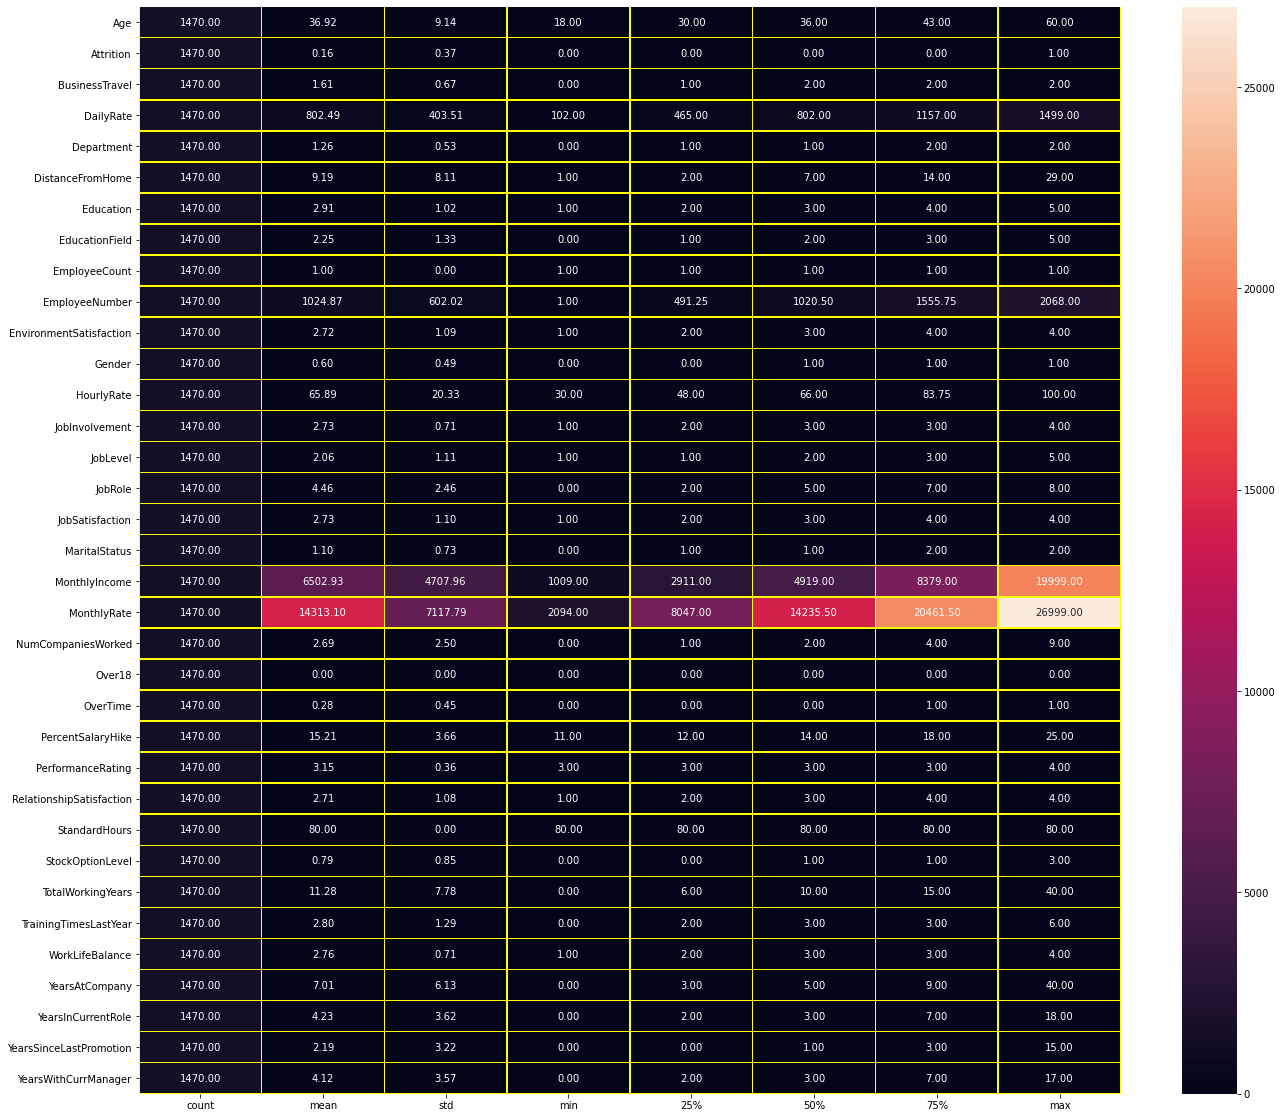

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,20))
sns.heatmap(hr.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

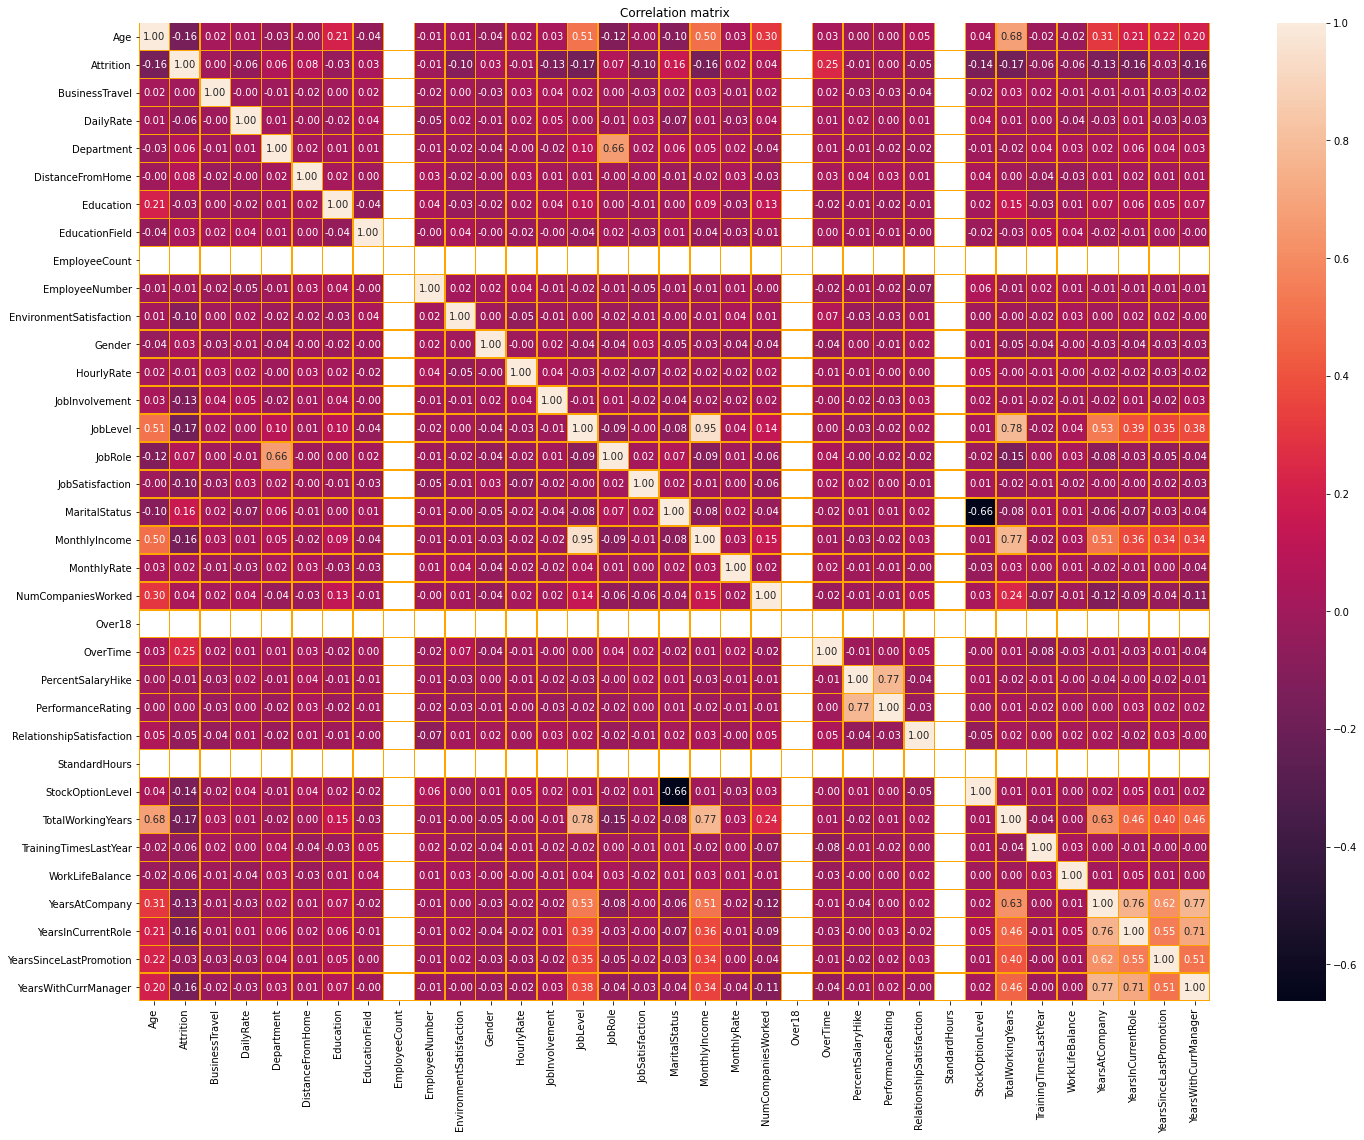

In [37]:
corr=hr.corr()                                               # multivariate analysis
plt.figure(figsize=(24,18))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

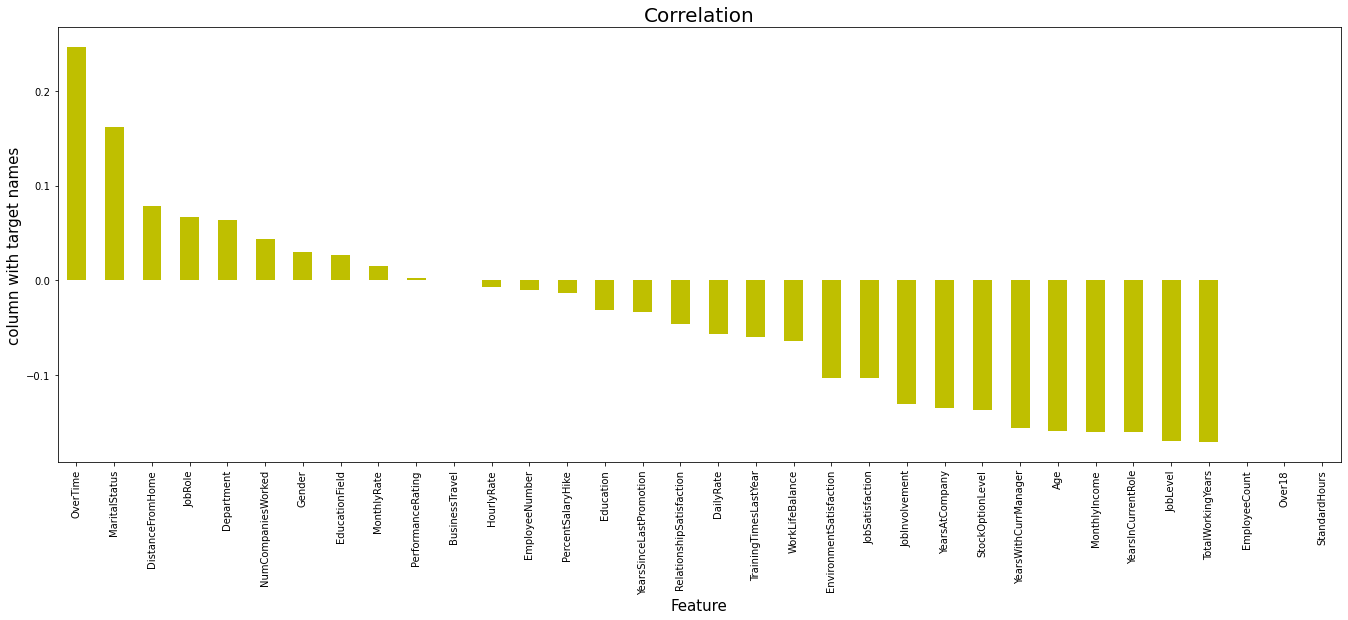

In [38]:
plt.figure(figsize=(23,8))
hr.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

In [39]:
hr.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

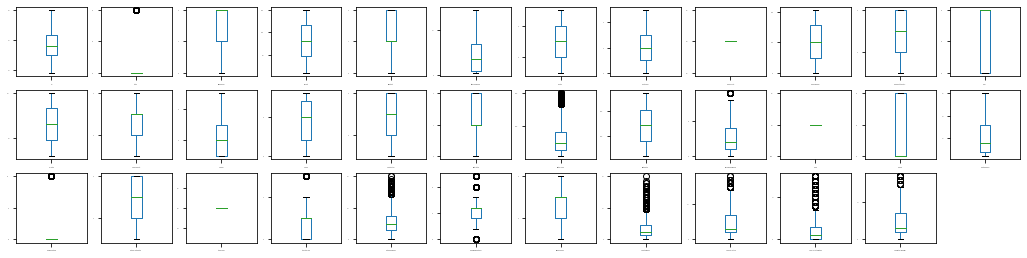

In [40]:
hr.plot(kind='box',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

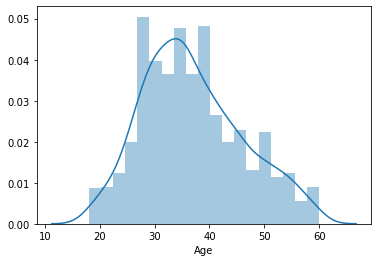

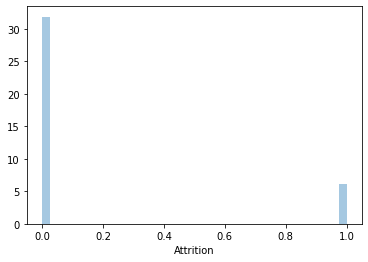

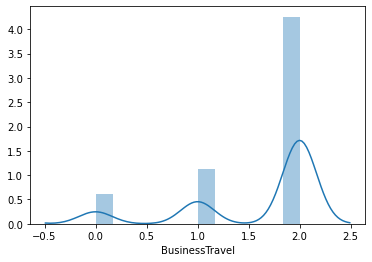

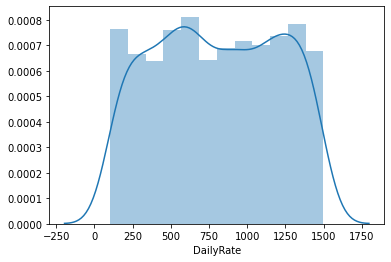

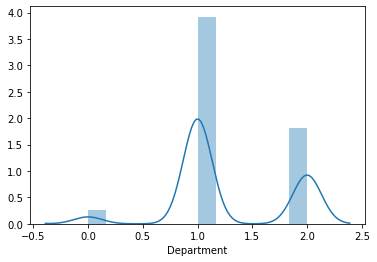

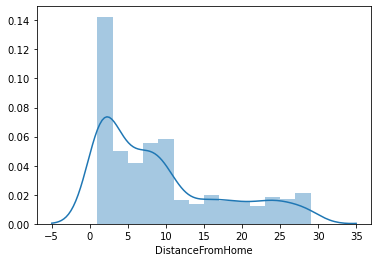

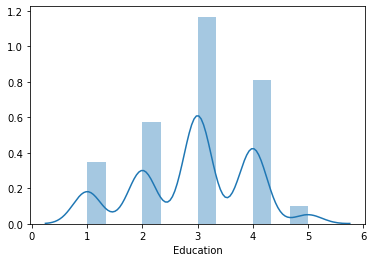

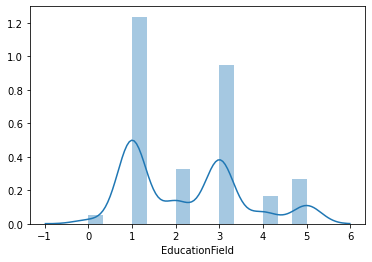

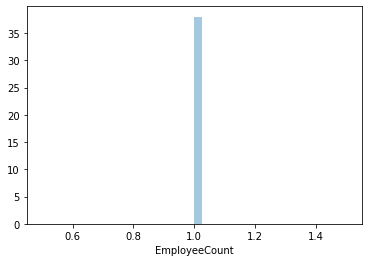

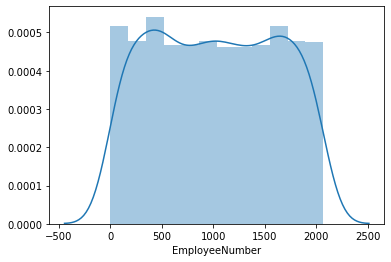

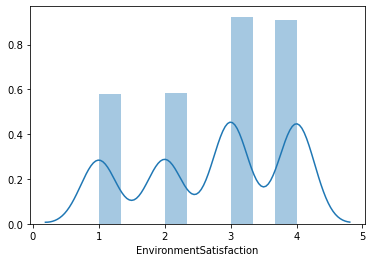

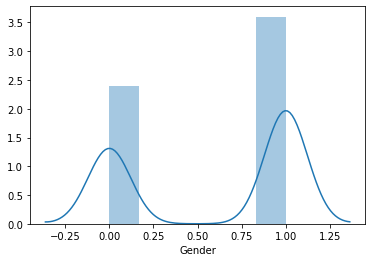

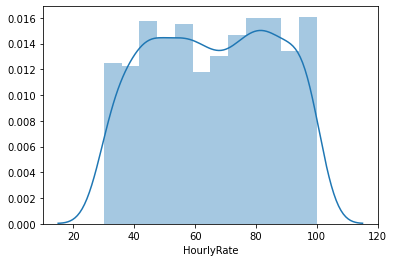

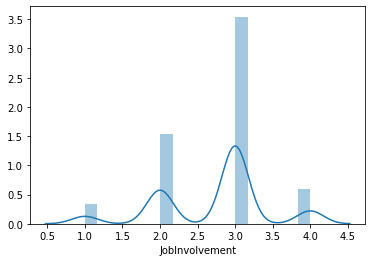

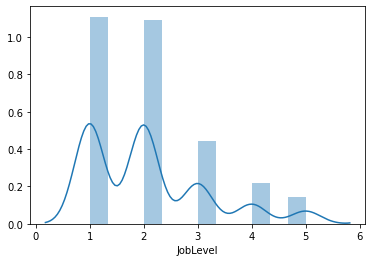

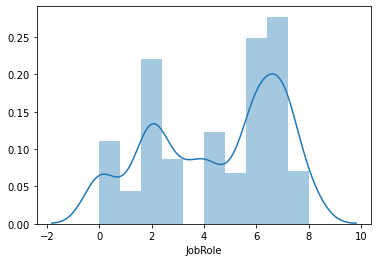

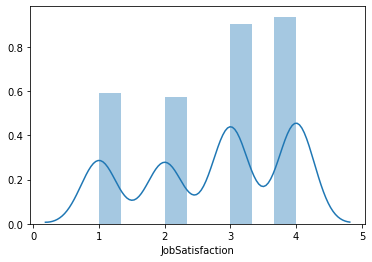

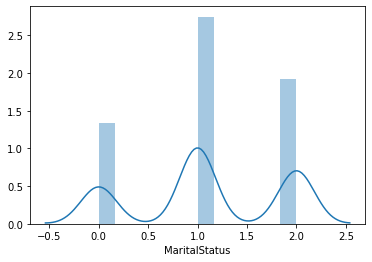

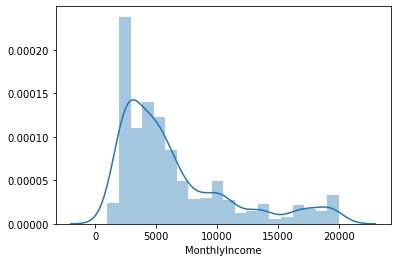

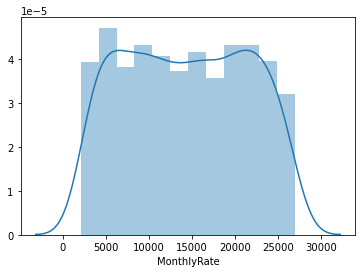

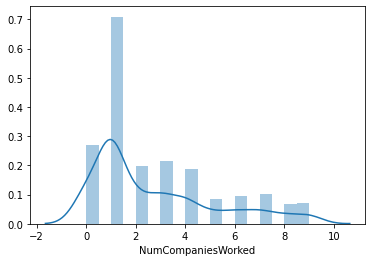

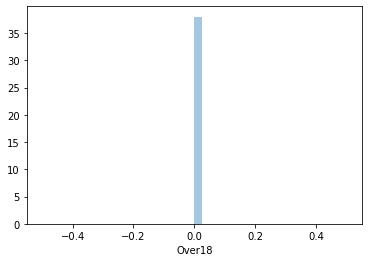

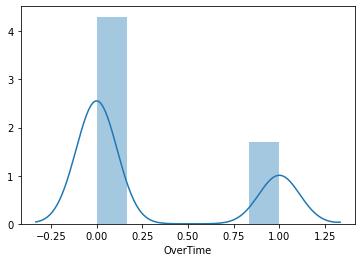

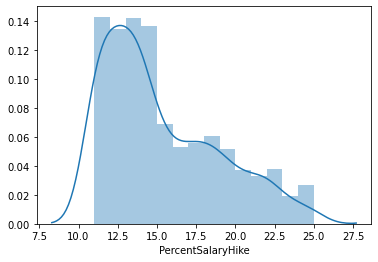

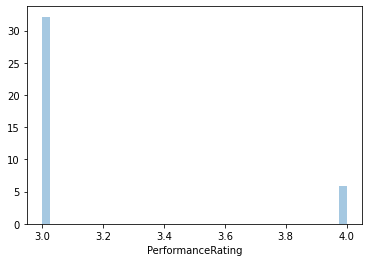

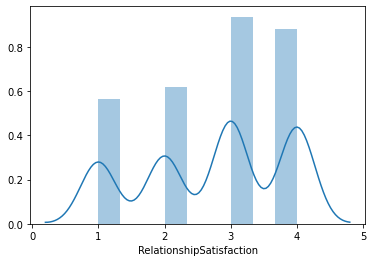

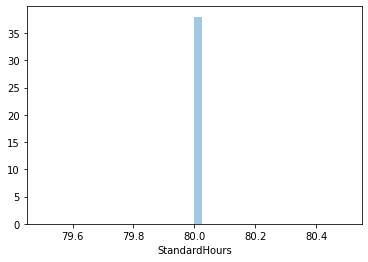

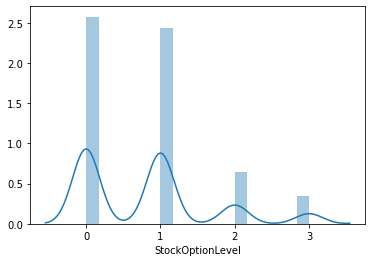

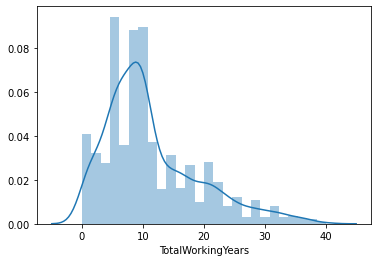

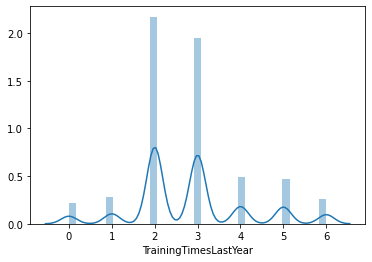

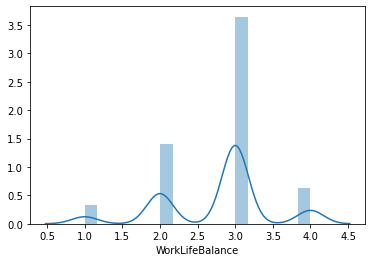

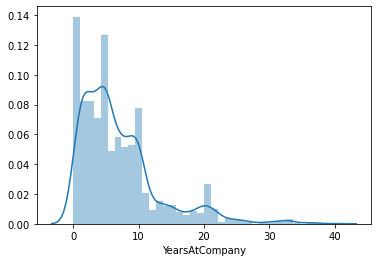

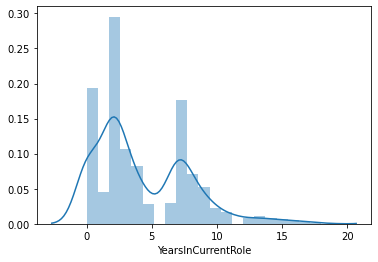

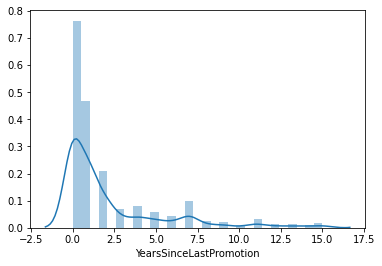

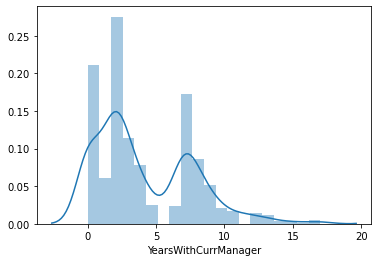

In [41]:
for k in hr.columns:
    plt.figure()
    sns.distplot(hr[k])

In [42]:
x=hr.drop(['Attrition'],axis=1)
y=hr['Attrition']

In [43]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(1470, 34)

In [44]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([33, 32, 30, 32, 31, 32, 27, 27, 30, 32, 31, 32, 33, 27, 30, 32, 33,
       32, 27, 33, 30, 31, 32, 31, 33, 30, 32, 27, 30, 31, 32, 32, 33, 27,
       30, 30, 32, 32, 27, 31, 30, 30, 32, 30, 33, 32, 30, 27, 30, 32, 33,
       27, 33, 30, 32, 

In [45]:
x_new=x[(z<3).all(axis=1)]
print(x.shape)
print(x_new.shape)

(1470, 34)
(0, 34)


In [46]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [47]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.8641975308641975 on Random_state  1
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8765432098765432 on Random_state  2
Best Accuracy is  0.8909465020576132 on Random_s

Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy is  0.9094650205761317 on Random_state  123
Best Accuracy 

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=123)

In [49]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8994565217391305
[[314   6]
 [ 31  17]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       320
         1.0       0.74      0.35      0.48        48

    accuracy                           0.90       368
   macro avg       0.82      0.67      0.71       368
weighted avg       0.89      0.90      0.88       368



In [50]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7880434782608695
[[274  46]
 [ 32  16]]
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       320
         1.0       0.26      0.33      0.29        48

    accuracy                           0.79       368
   macro avg       0.58      0.59      0.58       368
weighted avg       0.81      0.79      0.80       368



In [51]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8831521739130435
[[318   2]
 [ 41   7]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       320
         1.0       0.78      0.15      0.25        48

    accuracy                           0.88       368
   macro avg       0.83      0.57      0.59       368
weighted avg       0.87      0.88      0.85       368



In [52]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8831521739130435
[[306  14]
 [ 29  19]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       320
         1.0       0.58      0.40      0.47        48

    accuracy                           0.88       368
   macro avg       0.74      0.68      0.70       368
weighted avg       0.87      0.88      0.87       368



In [53]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)
predgn=gn.predict(x_test)
print(accuracy_score(y_test,predgn))
print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

0.8125
[[267  53]
 [ 16  32]]
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.89       320
         1.0       0.38      0.67      0.48        48

    accuracy                           0.81       368
   macro avg       0.66      0.75      0.68       368
weighted avg       0.87      0.81      0.83       368



In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()                                                      #by default = 5
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8641304347826086
[[313   7]
 [ 43   5]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       320
         1.0       0.42      0.10      0.17        48

    accuracy                           0.86       368
   macro avg       0.65      0.54      0.55       368
weighted avg       0.82      0.86      0.83       368



In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.904891304347826
[[320   0]
 [ 35  13]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       320
         1.0       1.00      0.27      0.43        48

    accuracy                           0.90       368
   macro avg       0.95      0.64      0.69       368
weighted avg       0.91      0.90      0.88       368



In [56]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(lg,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.870748299319728


In [57]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dt,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7816326530612244


In [58]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(svc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8612244897959183


In [59]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(gn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.789795918367347


In [60]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ab,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8571428571428571


In [61]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8448979591836734


In [62]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rfc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8537414965986395


minimum difference is accuracy and cross validation score is for decisiontreeclassifier so this is our best model.

In [63]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':np.arange(2,15),
       'criterion':['gini','entropy']}
gcv= GridSearchCV(DecisionTreeClassifier(),params,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [64]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [65]:
gcv.best_score_

0.8321308103661045

In [66]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [67]:
gcv_pred=gcv.best_estimator_.predict(x_test)

In [68]:
accuracy_score(gcv_pred,y_test)

0.8777173913043478

In [69]:
import joblib
joblib.dump(dt,'HRAttritionRatemodel.pkl')

['HRAttritionRatemodel.pkl']